## Particle simulations with and without cell confinement 

In this tutorial I provide instuctions about using the "bound_particle_simulation" class in the "Simulation_of_confined_particles" and the "unbound_particle_fast_simulation" class in the "Simulations_of_free_particles" Python scripts. The simulations can be performed sampling from an experimentally sampled distribution of diffusion coefficients. The sampled diffusion coefficients are used to reconstruct the displacements distribution for Brownian motion using the equation: $$\sigma = \sqrt{2D_{eff}\tau}$$, 
where $D_{eff}$ is the effective diffusion coefficient in $\mu m^2/sec$, $\tau$ is the sampling intercal in sec and $\sigma$ is the standard deviation of the displacements around zero.

<br> *Developed by Dr Alexandros Papagiannakis, Stanford University, 2025* <br/>

In [1]:
import Simulations_of_confined_particles as conf
import Simulations_of_free_particles as free
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_distribution_of_diffusion_coefficients(mean, std, number_of_values):
    return np.random.normal(loc=mean, scale=std, size=number_of_values)

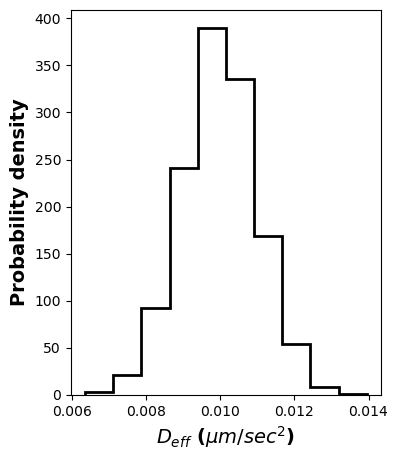

In [3]:
Deff = generate_distribution_of_diffusion_coefficients(0.01, 0.001, 10000)

plt.figure(figsize=(4,5))
plt.hist(Deff, histtype='step', density=True, color='black', linewidth=2)
plt.xlabel(r'$D_{eff}$ ($\mu m/sec^2$)', fontsize=14, fontweight='bold')
plt.ylabel(r'Probability density', fontsize=14, fontweight='bold')
plt.show()

### Simulations of freely diffusing particles ###

In [6]:
fast_par = free.unbound_particle_fast_simulation(interval=0.05, frames=300)
sim_df = fast_par.run_simulation(5000, Deff,5,False)

generating trajectories from a normal distribution of effective
diffusion coefficients with a mean of 0.009940306083129246 μm2/sec
1000 out of 5000 trajectories
2000 out of 5000 trajectories
3000 out of 5000 trajectories
4000 out of 5000 trajectories
5000 out of 5000 trajectories


### Simulations with cell confinement and nucleoid exclusion ###

generating trajectories from a normal distribution of effective
diffusion coefficients with a mean of 0.009940306083129246 μm2/sec
cell with length 2.86 μm, and width 0.8 μm...
that contains a nucleoid with length 1.72 μm, and width 0.7 μm


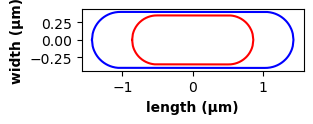

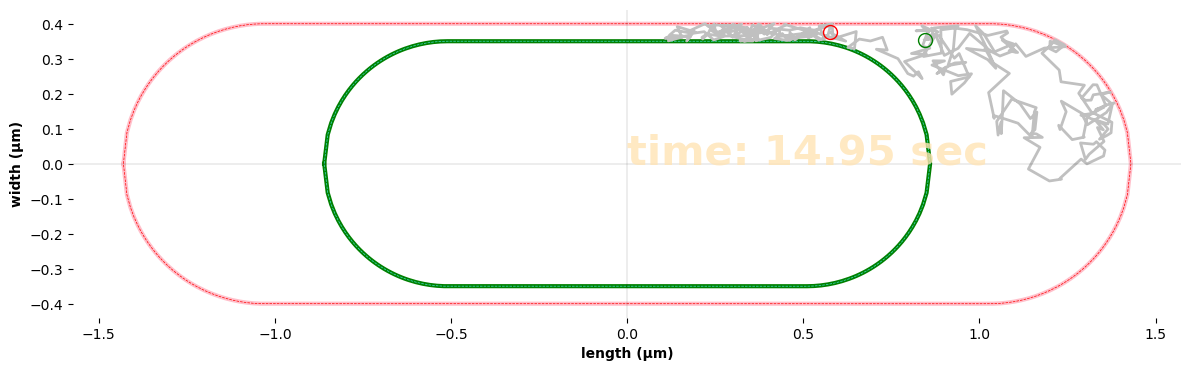

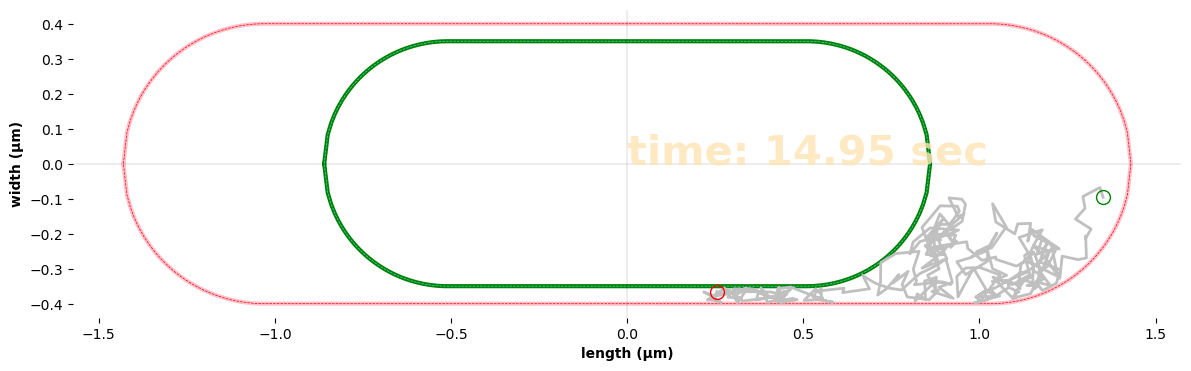

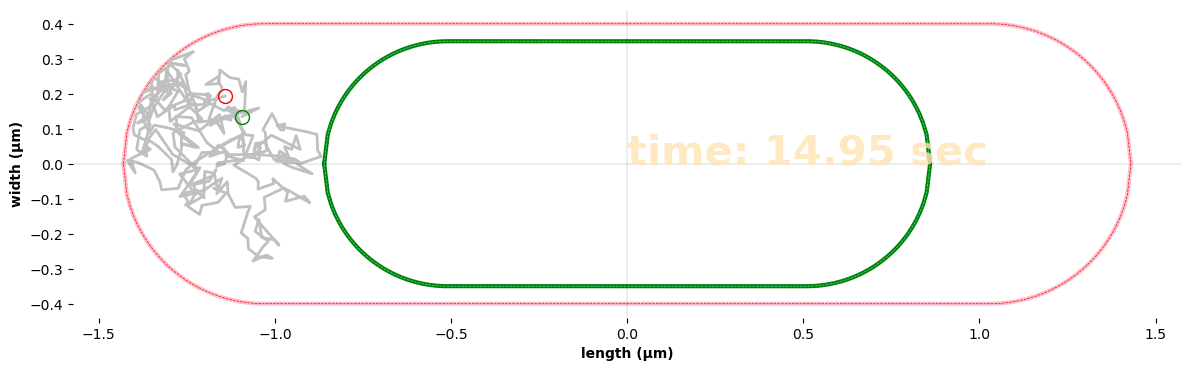

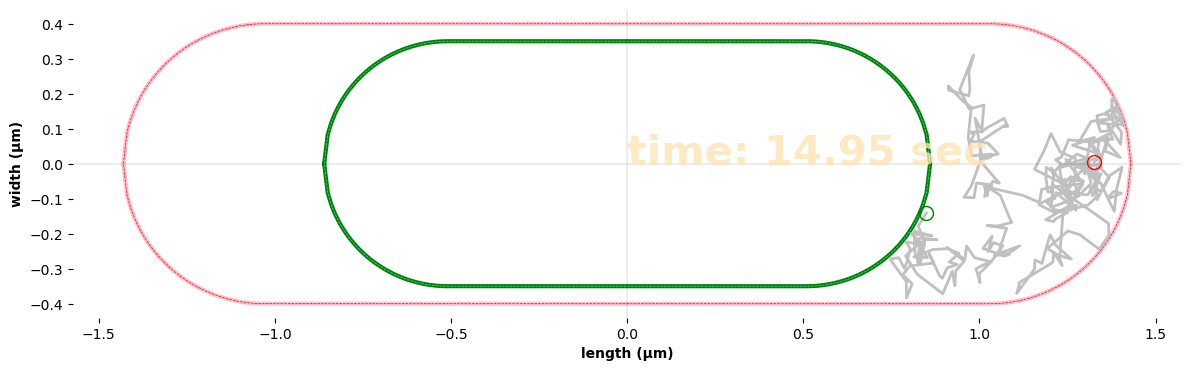

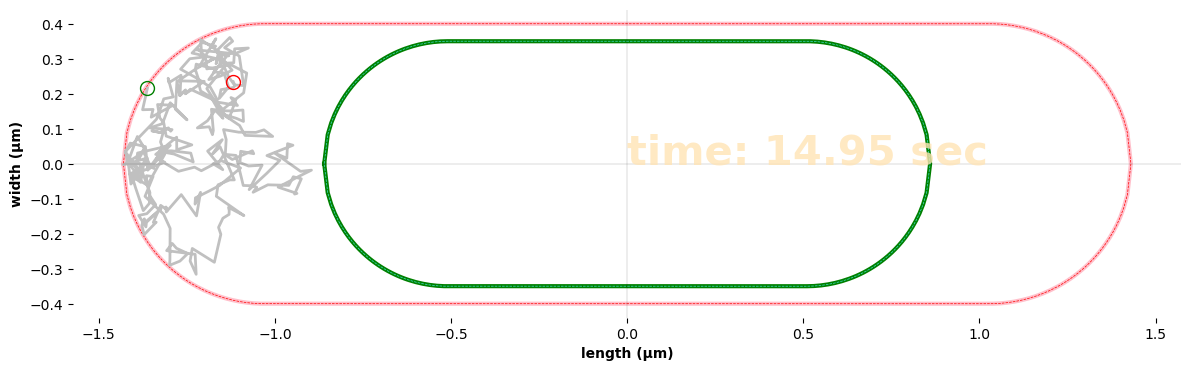

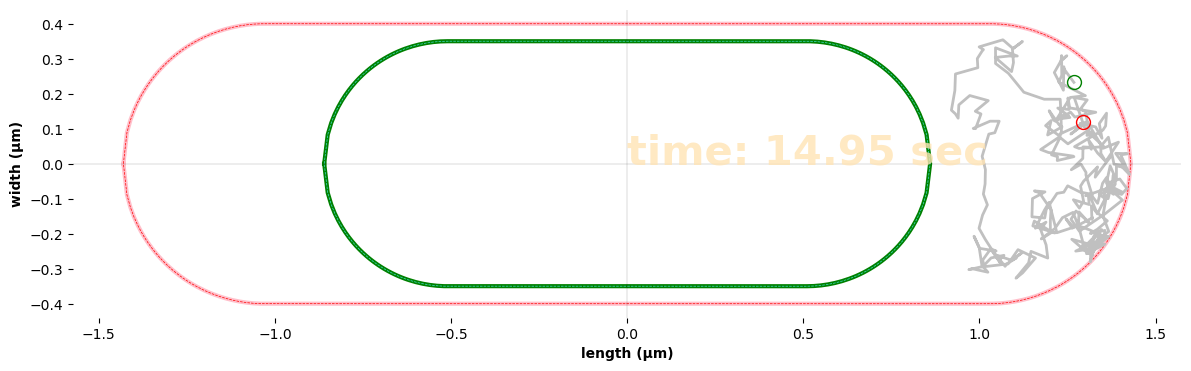

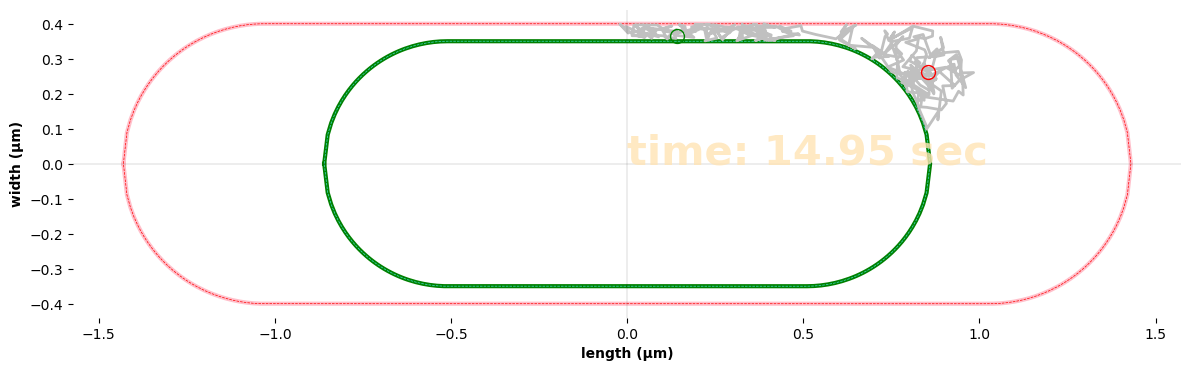

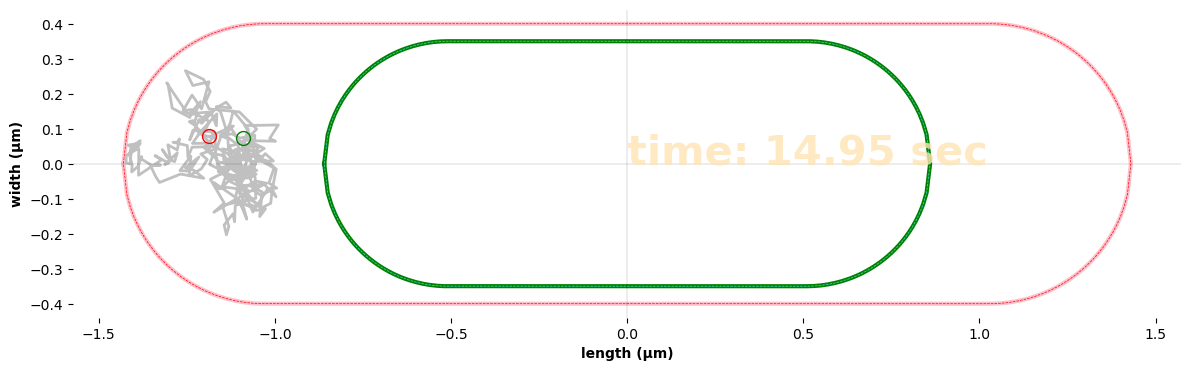

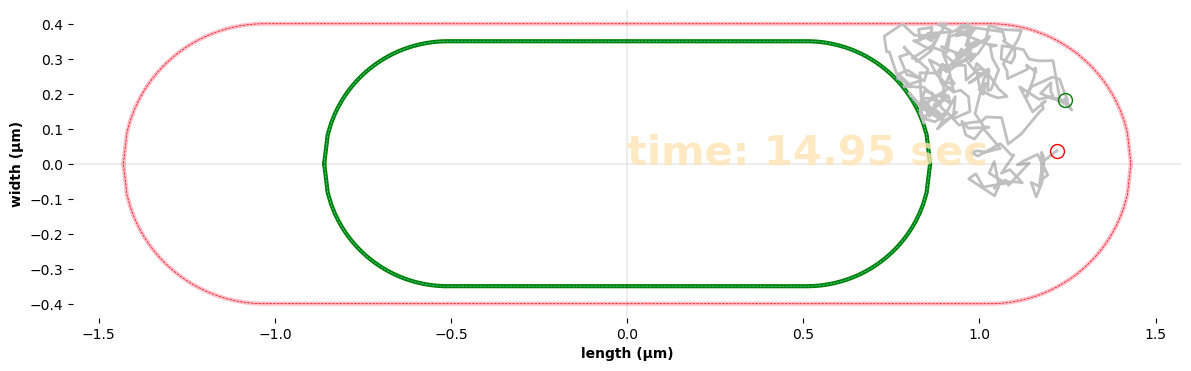

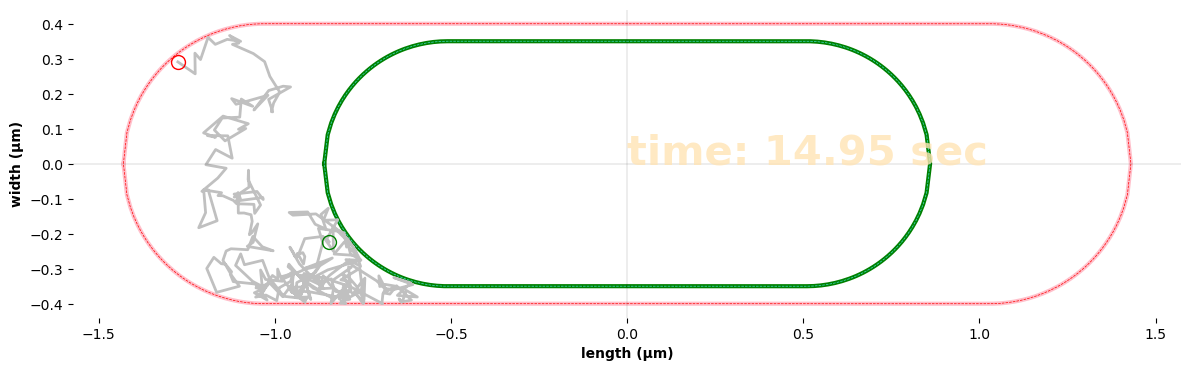

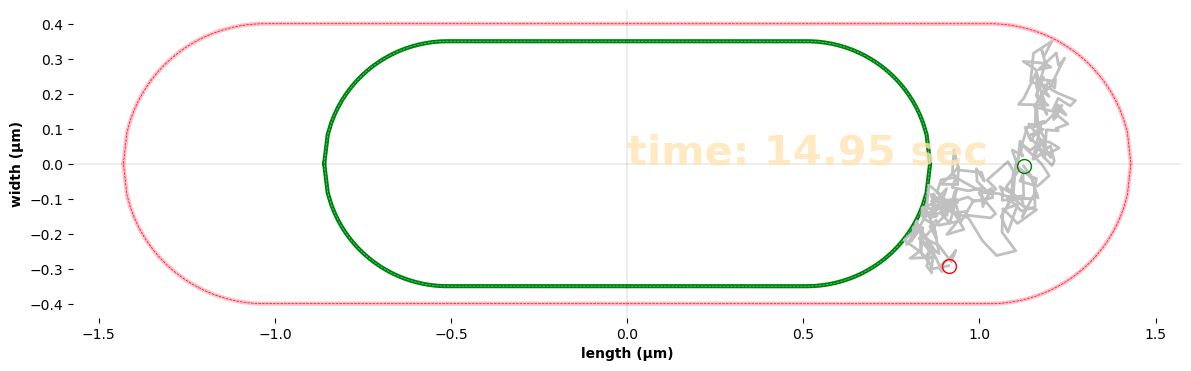

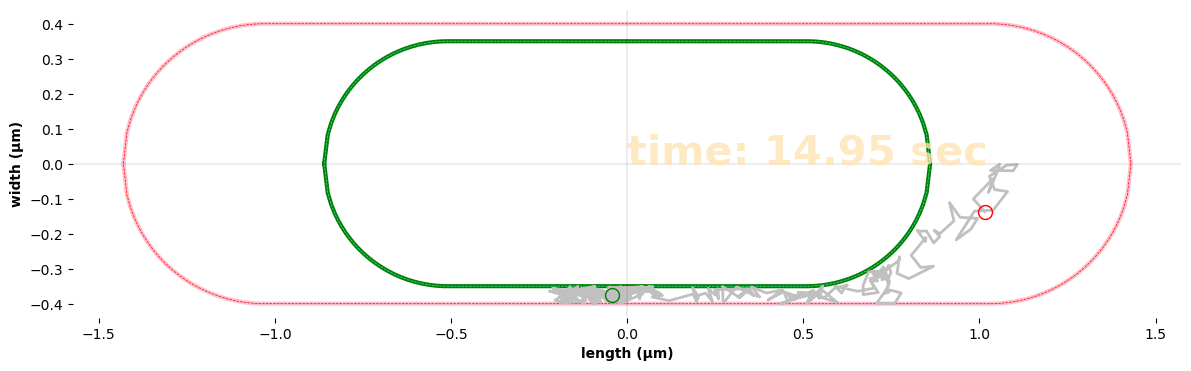

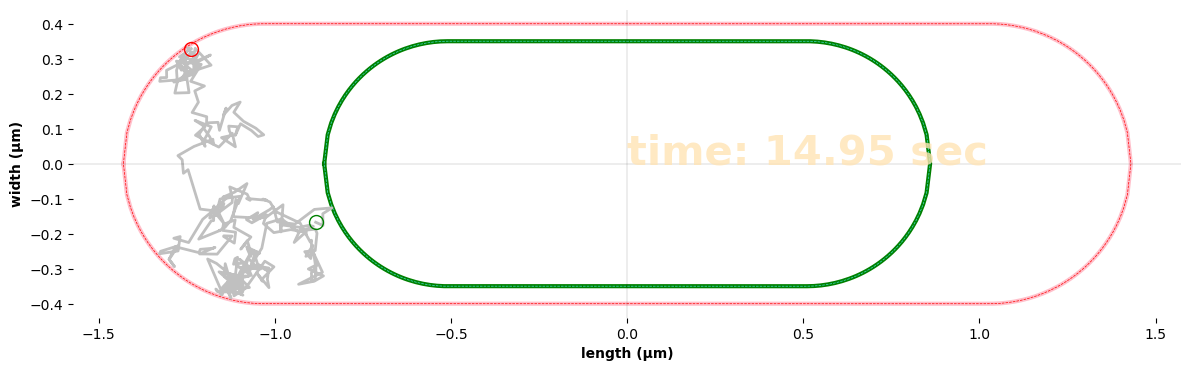

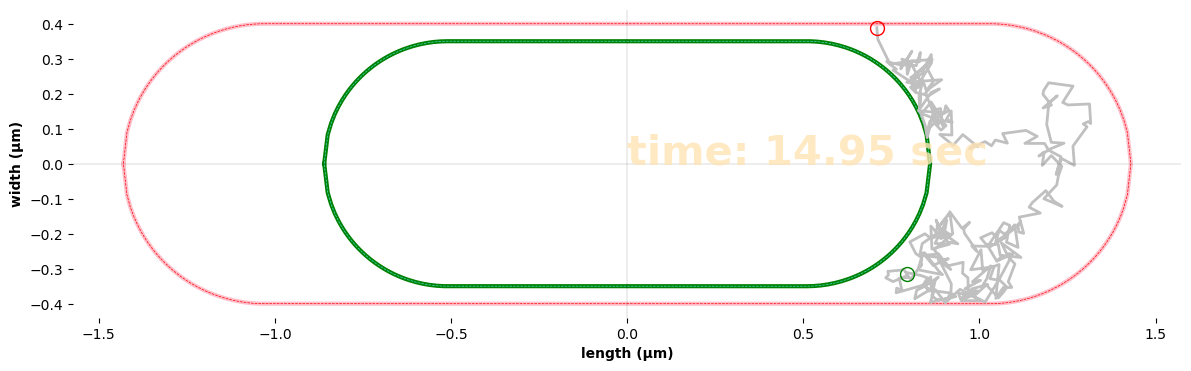

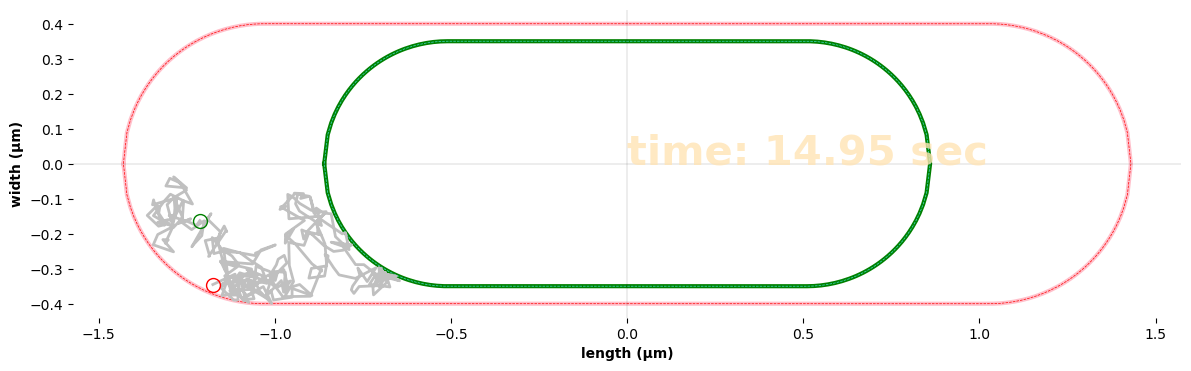

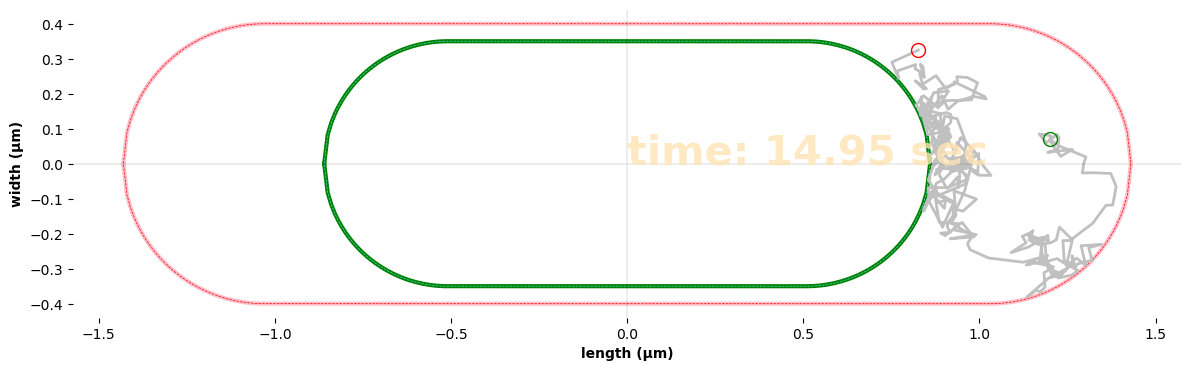

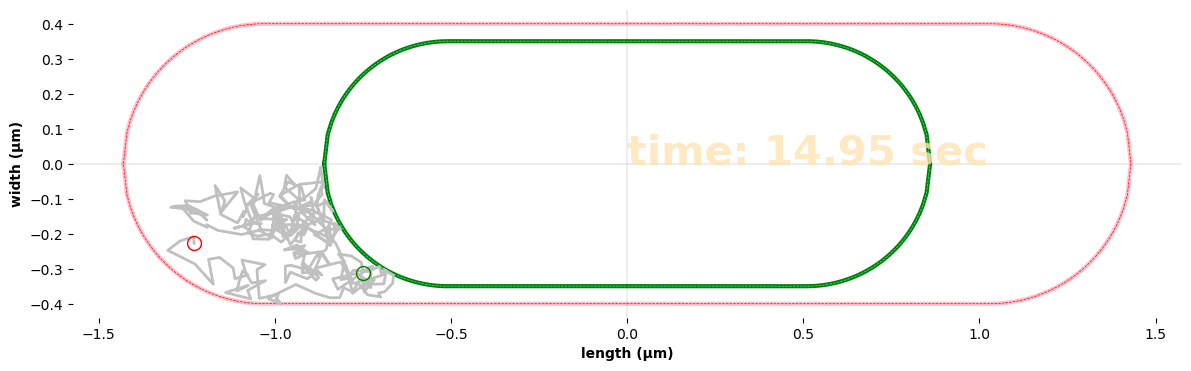

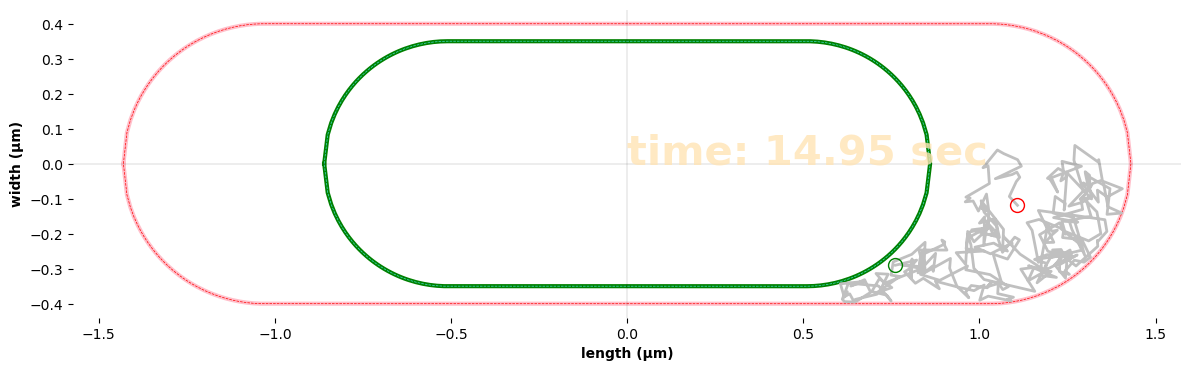

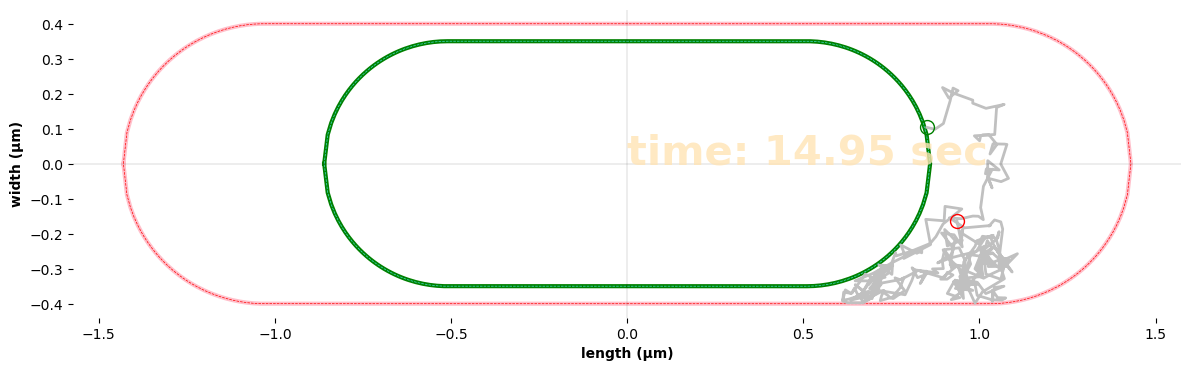

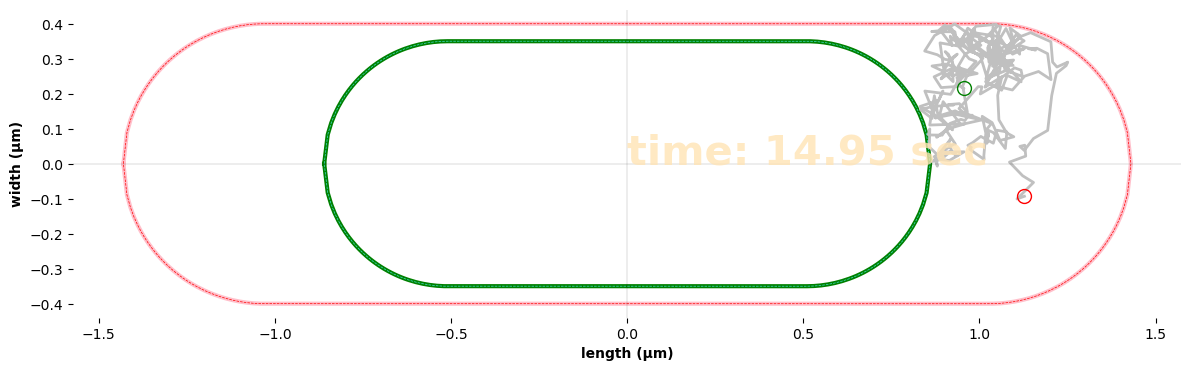

In [5]:
nuc_particle_displacements, nuc_particle_positions = conf.run_simulation(1000, 2.86, 0.8, 0.7, 
                                                                         1.72, 300, Deff, 0.05, 
                                                                         0, 5, True, 50, None)